# Regression
Only for continous data or relation

Simple linear regression is the basic ML model  
you must be aware about the equation of line **y=mx+c**  
This function tries to make best fit line for our dataset   
obviously to know if we should apply this or not we must be aware about the data  

In [1]:
import pandas as pd
data=pd.read_csv('data/Salary_Data.csv')
data = data.dropna(how='any',axis=0) 

In [2]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


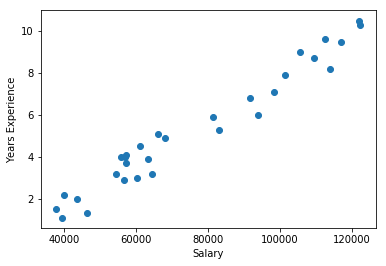

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data["Salary"],data["YearsExperience"])
plt.xlabel("Salary")
plt.ylabel("Years Experience")
plt.show()

Data set looks linear

In [5]:
x=data['YearsExperience'].values.reshape(-1,1)
y=data['Salary'].values.reshape(-1,1)

it is necessary to have a dataset to train and one dataset to train.  
But these two must be of same origin to prevent error  
so if test data is not given explicitly make your own by spilting th data  
for small data we can split the ratio of about  
train: 0.8 test 0.2

for larger dataset we can split in the ratio of 
train: 0.01 test 0.99  

some people also consider using another dataset called dev set or validation set  
but its of little use as of now

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# sklearn.linear_model.LinearRegression
This class makes a best fit line  
* chose random variable m and c
* calculate y prediction using it
* calculater error(root mean square)
* update variables to get least error using stats formula

you can find more equations to do so  
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/  
https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86


In [7]:
from sklearn.linear_model import LinearRegression
r1=LinearRegression()    #this is an object which store value of slope and intercept
r1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
r1.intercept_

array([26780.09915063])

In [9]:
r1.coef_

array([[9312.57512673]])

In [10]:
y_pred = r1.predict(X_test)

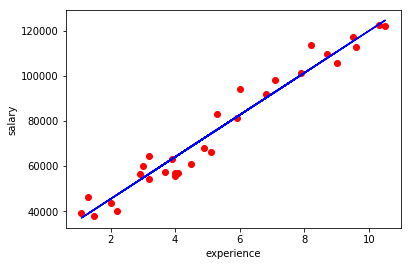

In [11]:
#visualising
plt.scatter(x,y,color='red')
plt.plot(X_train, r1.predict(X_train),color='blue')
plt.ylabel('salary')
plt.xlabel('experience')
plt.show()

In [12]:
#lets predict value for experience of 12 years
import numpy as np
p=np.asarray([12]).reshape(-1,1)
r1.predict(p)

array([[138531.00067138]])

That was for one independent varibale  
what about more multiple
## Multi_linear_regression

y=b0 + b1x1 + b2x2 +b3x3 ...

In [13]:
dataset = pd.read_csv('data/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [14]:
data=pd.get_dummies(dataset)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [15]:
#remember about dummy varibale trap
x=data[["R&D Spend","Administration","Marketing Spend","State_California","State_Florida","State_New York"]].values
y=data["Profit"].values.reshape(-1,1)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
y=sc.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
l1.fit(x_train,y_train)
y_pred=l1.predict(x_test)

In [19]:
y_pred

array([[-0.22549357],
       [ 0.51551579],
       [ 0.51214398],
       [-1.00339484],
       [ 1.66724405],
       [ 0.10397219],
       [-1.10676062],
       [-0.33134202],
       [ 0.04904118],
       [ 1.40117567]])

In [20]:
y_test

array([[-0.21879755],
       [ 0.80816756],
       [ 0.85484675],
       [-0.85746568],
       [ 1.98084225],
       [-0.17554233],
       [-0.77149734],
       [-0.36412744],
       [-0.04161264],
       [ 1.35774012]])

In [21]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_pred) 


0.052448371537731

Now to remove dummy variable trap I removed NYC

In [22]:
x1=data[["R&D Spend","Administration","Marketing Spend","State_California","State_Florida"]].values
y1=data["Profit"].values.reshape(-1,1)
sc = StandardScaler()
x1=sc.fit_transform(x1)
y1=sc.fit_transform(y1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2,random_state=0)
l1=LinearRegression()
l1.fit(x1_train,y1_train)
y1_pred=l1.predict(x1_test)
mean_squared_error(y1_test,y1_pred) 

0.052448371537730985

### there's a decrease in loss
for larger dataset this would be significant  
why does it happen?

actually if we consider y=b0 + b1x1 + b2x2 +b3x3  
where x2 and x3 are dummy variable  
that is if x2=1 ,x3 =0  
so x3 = 1-x2  

y=b0 + b1x1 + b2x2 +b3(1-x2)  

y=b0 + b3 + b1x1 + x2 (b2-b3)  
so variable b3 is adding an error to constant od the equation and subtracting from b2
this is dummy variable trap

### Backword elimination
refer this https://medium.com/@manjabogicevic/multiple-linear-regression-using-python-b99754591ac0  

# Polynomial regression
degree 2  
y= ax^2 + bx + c  

degree 3   
y = ax^3 + bx^2 + cx + d

In [23]:
data = pd.read_csv('data/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [24]:
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
p1= PolynomialFeatures(degree=2)        # lets start with degree 2
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

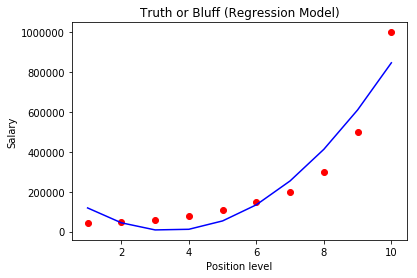

In [26]:
plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

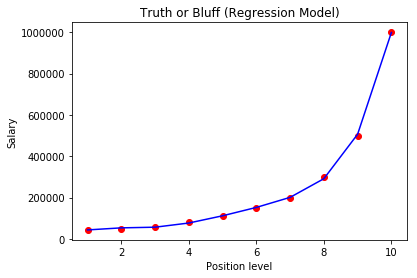

In [27]:
p1= PolynomialFeatures(degree=5)        # lets start with degree 5
x_poly=p1.fit_transform(x)
l2=LinearRegression()
l2.fit(x_poly,y)

plt.scatter(x, y, color = 'red')
plt.plot(x, l2.predict(p1.fit_transform(x)), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

That's all for the week  
do refer the link and practice  
you can also refer here for more regression models  
https://www.superdatascience.com/pages/machine-learning